In [44]:
import numpy as numpy
import pandas as pd


In [45]:
df=pd.read_csv("spam.csv", encoding="ISO-8859-1")


In [46]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2914,ham,Nothing lor... A bit bored too... Then y dun u...,NaN,NaN,NaN
1846,ham,Its on in engalnd! But telly has decided it wo...,NaN,NaN,NaN
3702,ham,How is my boy? No sweet words left for me this...,NaN,NaN,NaN
1528,ham,Hey what happen de. Are you alright.,NaN,NaN,NaN
3417,spam,LIFE has never been this much fun and great un...,NaN,NaN,NaN


In [47]:
df.shape

(5572, 5)

In [48]:
# 1) data cleaning
#2) EDA
# 3) text preprocesing
# 4) modle building
# 5) evaluation
# 6) improvements
# 7) website
# 8) depl0y

DATA CLEANING

In [49]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [50]:
# drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [51]:
df.sample(5)

,v1,v2
2160,ham,No. Its not specialisation. Can work but its s...
696,ham,"Aight, you close by or still down around alex'..."
1399,ham,You have registered Sinco as Payee. Log in at ...
3355,ham,Ok not a problem will get them a taxi. C ing ...
285,ham,"K, I might come by tonight then if my class le..."


In [52]:
# renamming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [53]:
df.sample(5)

,target,text
3816,ham,This is my number by vivek..
1520,spam,"URGENT! Your Mobile No was awarded a å£2,000 B..."
5259,ham,Can help u swoop by picking u up from wherever...
668,ham,Have a good evening! Ttyl
4742,ham,I am in hospital da. . I will return home in e...


In [54]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [55]:
df['target']=encoder.fit_transform(df['target'])

In [56]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [57]:
## check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [58]:
# check for duplicate values
df.duplicated().sum()

403

In [59]:
df=df.drop_duplicates(keep='first')

In [60]:
df.shape

(5169, 2)

In [61]:
######################exploratory data analysisa##############################

In [62]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1ed0df14710>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

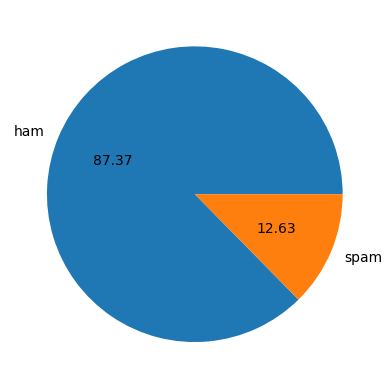

In [63]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")

In [64]:
##data is imbalanced


In [65]:
# %pip install nltk
%pip install nltk


In [66]:
import nltk

In [67]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
df.columns

Index(['target', 'text'], dtype='object')

In [69]:
df['num_characters']=df['text'].apply(len)

In [70]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [71]:
# num of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [72]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [73]:
# num of setences
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [74]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [75]:
df.columns


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [76]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [77]:
######these are ham (non spam messages)
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [78]:
######these are  ( spam messages)
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

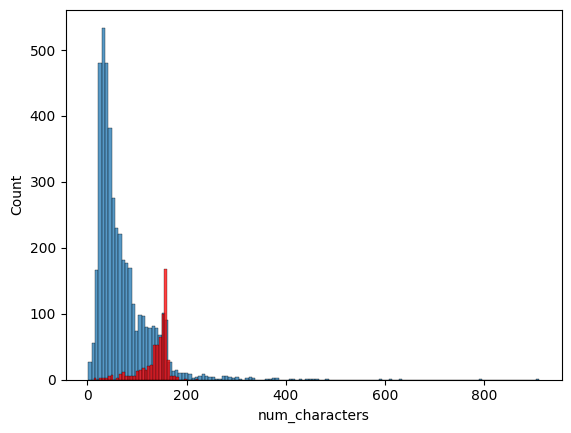

In [79]:
########spam messeges avg is larger than ham messeges
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


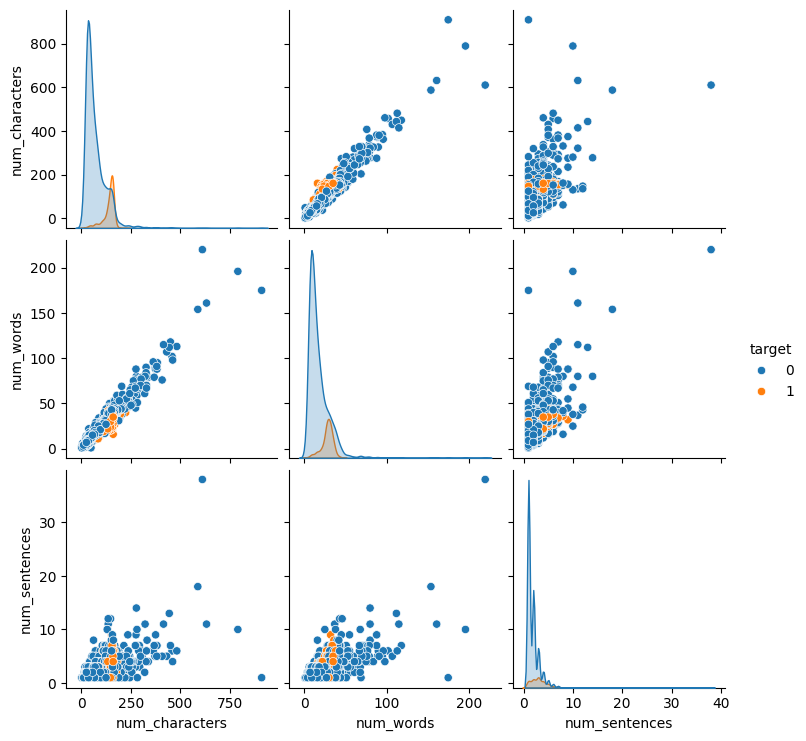

In [80]:
sns.pairplot(df,hue='target')

<Axes: >

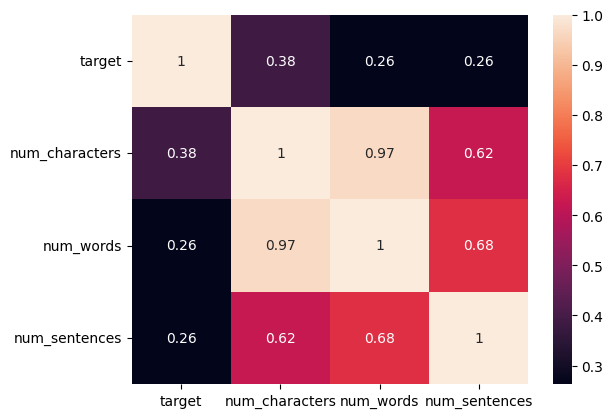

In [86]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

DATA PREPROCESSING
    lowercase
    tokenization
    removing special chaarachters
    removing step words and punctuation
    stemming

In [104]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [105]:
import string


In [106]:


# stopwords.words('english')

In [107]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [111]:
# transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [110]:
# df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [113]:
df['transformed_text']=df['text'].apply(transform_text)

In [114]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [119]:


from wordcloud import WordCloud

In [120]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [121]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

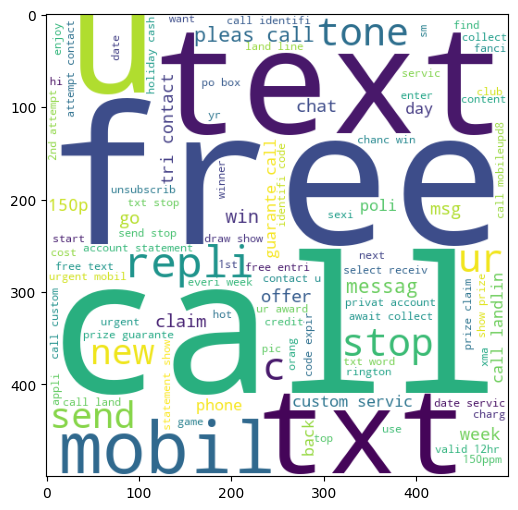

In [122]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [123]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

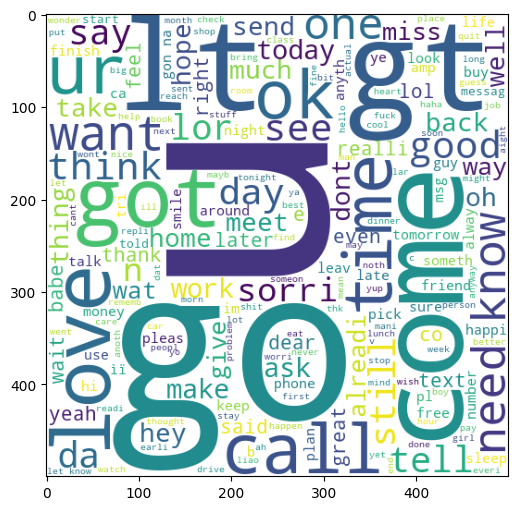

In [124]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [140]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [141]:
len(spam_corpus)

9939

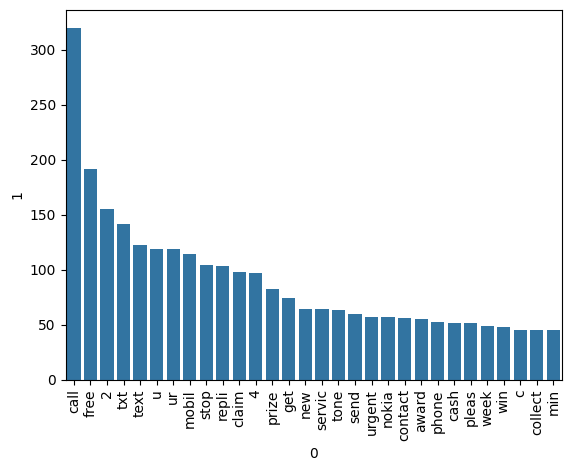

In [142]:
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [143]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        

In [144]:
len(ham_corpus)

35404

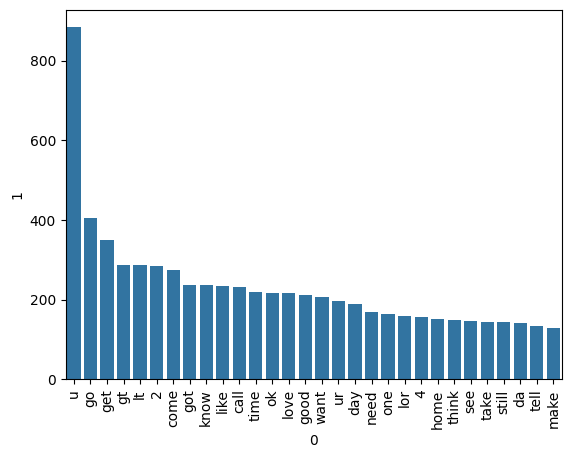

In [139]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [145]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [146]:
#####text vectorization
######using bag of words

MODEl BUILDING

In [212]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [213]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [214]:
# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# X=scaler.fit_transform(X)

In [215]:
X.shape

(5169, 3000)

In [216]:
y=df['target'].values

In [217]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [220]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [221]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [222]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
#very bad output obtained

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [223]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
# still better

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [224]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
# good


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [209]:
# due to imbalance data we prefer accuracy 
# tfidf,mnb used


In [210]:
import pickle

In [211]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))